In [ ]:
Final Project - Abstract of Hypothetical Problem for Data Science

One database
    Four csv files:
        boran.csv
        deidentify_list_cross_ref.csv
        radan.csv
        planet_info.csv

Three tables:
    Patient readings - boran.csv and radan.csv:
        patient_id = PK
        planet_id = FK
        blood_pressure
        exercise
        weight
        glucose
        bmi
    Patient info - deidentify_list_cross_ref.csv:
        Autogenerated key = PK
        patient_id = FK
        age
    Planet info - planet_info.csv:
        planet_id = PK
        planet_name

In [119]:
#Drop all tables because you screwed up.
#import sqlite3

#db = sqlite3.connect("finalproject.db")
#cursor = db.cursor()

#cursor.execute("DROP TABLE patient_info")
#cursor.execute("DROP TABLE planet_info")
#cursor.execute("DROP TABLE patient_readings")
#cursor.execute("DROP VIEW V_Patients")
#db.commit()
#db.close()

In [120]:
#create the database
db = sqlite3.connect("finalproject.db")

#initiate cursor and call connection
cursor = db.cursor()

#create table structures
planet_info = """CREATE TABLE planet_info (
                planet_id       INTEGER PRIMARY KEY not null,
                planet_name     TEXT not null)"""

patient_info = """CREATE TABLE patient_info (
                ID              INTEGER PRIMARY KEY not null,
                patient_id      INTEGER not null,
                age             REAL,
                FOREIGN KEY(patient_id) REFERENCES patients_readings(patient_id)
                ON UPDATE CASCADE
                ON DELETE RESTRICT,
                check (age >= 0))"""

patient_readings = """CREATE TABLE patient_readings (
                patient_id      INTEGER PRIMARY KEY not null,
                blood_pressure  REAL,
                exercise        REAL,
                weight          REAL,
                glucose         REAL,
                bmi             REAL,
                planet_id       INTEGER not null,
                FOREIGN KEY(planet_id) REFERENCES planet_info(planet_id)
                ON UPDATE CASCADE
                ON DELETE RESTRICT,
                check (blood_pressure >= 0),
                check (exercise >= 0),
                check (weight >= 0),
                check (glucose >= 0),
                check (bmi >= 0))"""

cursor.execute(planet_info)
cursor.execute(patient_info)
cursor.execute(patient_readings)

db.commit()
db.close()

In [121]:
#Import CSV files into tables
import csv

db = sqlite3.connect("finalproject.db")
cursor = db.cursor()

with open('deidentify_list_cross_ref.csv', 'rb') as pa:
    fcsv3 = csv.reader(pa)
    info_load3 = [record for record in fcsv3]
    del info_load3[0]
    cursor.executemany("INSERT INTO patient_info (patient_id, age)  VALUES (?, ?)", info_load3)

with open('planet_info.csv', 'rb') as PL:
    fcsv4 = csv.reader(PL)
    info_load4 = [record for record in fcsv4]
    del info_load4[0]
    cursor.executemany("INSERT INTO planet_info (planet_id, planet_name) VALUES (?, ?)", info_load4)

with open('boran.csv', 'rb') as p1:
    fcsv1 = csv.reader(p1)
    info_load1 = [record for record in fcsv1]
    del info_load1[0]
    cursor.executemany("INSERT INTO patient_readings(patient_id, blood_pressure, exercise, weight, glucose, bmi, planet_id) VALUES (?, ?, ?, ?, ?, ?, ?)", info_load1)

with open('radan.csv', 'rb') as p2:
    fcsv2 = csv.reader(p2)
    info_load2 = [record for record in fcsv2]
    del info_load2[0]
    cursor.executemany("INSERT INTO patient_readings(patient_id, blood_pressure, exercise, weight, glucose, bmi, planet_id) VALUES (?, ?, ?, ?, ?, ?, ?)", info_load2)
    
db.commit()
db.close()

In [95]:
#db = sqlite3.connect("finalproject.db")
#cursor = db.cursor()

#construct query to retrieve data from table
#SQL = "SELECT * FROM patient_readings"

#cursor.execute(SQL)

#for reading in cursor:
#    print reading
    
#db.commit()
#db.close()

In [94]:
#db = sqlite3.connect("finalproject.db")
#cursor = db.cursor()

#construct query to retrieve data from table
#SQL = "SELECT * FROM patient_info"

#cursor.execute(SQL)

#for reading in cursor:
#    print reading
    
#db.commit()
#db.close()

In [122]:
#db = sqlite3.connect("finalproject.db")
#cursor = db.cursor()

#construct query to retrieve data from table
#SQL = "SELECT * FROM planet_info"

#cursor.execute(SQL)

#for reading in cursor:
#    print reading
    
#db.commit()
#db.close()

In [123]:
db = sqlite3.connect("finalproject.db")
cursor = db.cursor()

query = """CREATE VIEW V_Patients as
Select           pl.planet_name, pr.patient_id, blood_pressure, exercise, weight, glucose, bmi, age
from planet_info pl
join patient_readings pr
        on pl.planet_id = pr.planet_id
join patient_info pa
        on pr.patient_id = pa.patient_id;"""

cursor.execute(query)
db.commit()
db.close()

In [125]:
#db = sqlite3.connect("finalproject.db")
#cursor = db.cursor()

#view joined table
#SQL = "SELECT * FROM V_Patients"

#cursor.execute(SQL)

#for reading in cursor:
#    print reading
    
#db.commit()
#db.close()

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

a = np.zeros(shape=(30,2))
db = sqlite3.connect('finalproject.db')
cursor = db.cursor()

SQL = "SELECT blood_pressure, age FROM V_Patients where planet_name = 'boran'"

cursor.execute(SQL)

row = 0
for rec in cursor:
    a[row] = [rec[0],rec[1]]
    row += 1

db.commit()
db.close()
#print a

In [130]:
b = np.zeros(shape=(30,2))
db = sqlite3.connect('finalproject.db')
cursor = db.cursor()

SQL = "SELECT blood_pressure, age FROM V_Patients where planet_name = 'radan'"

cursor.execute(SQL)

row = 0
for rec in cursor:
    b[row] = [rec[0],rec[1]]
    row += 1

db.commit()
db.close()
#print b

In [133]:
db = sqlite3.connect('finalproject.db')
df1 = pd.read_sql_query("SELECT blood_pressure, age FROM V_Patients where planet_name = 'boran'", db)

db.close()
df1.head()

,blood_pressure,age
0,191.853108,76.957462
1,189.628666,74.242965
2,199.378675,86.055427
3,197.254505,75.937458
4,174.605957,59.481521


In [134]:
db = sqlite3.connect('finalproject.db')
df2 = pd.read_sql_query("SELECT blood_pressure, age FROM V_Patients where planet_name = 'radan'", db)

db.close()

df2.head()

,blood_pressure,age
0,102.358126,80.076495
1,105.261325,86.508208
2,104.480912,78.058313
3,101.532439,79.982882
4,99.872391,80.371192


('Coefficients: \n', array([[ 1.14074587]]))
Mean squared error: 21.21
Variance score: 0.81


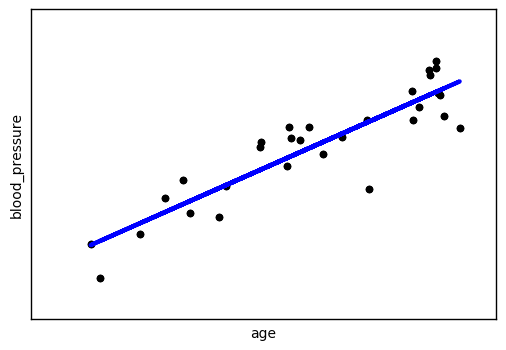

In [137]:
from sklearn import linear_model

# this allows plots to appear directly in the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
df1.plot(kind='scatter', x='age', y='blood_pressure')

age1 = df1.age
bp1 = df1.blood_pressure

age1 = age1.reshape(-1, 1)
bp1 = bp1.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(age1, bp1)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(age1) - bp1) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(age1, bp1))

# Plot outputs
plt.scatter(age1, bp1,  color='black')
plt.plot(age1, regr.predict(age1), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

('Coefficients: \n', array([[ 0.47088464]]))
Mean squared error: 7.21
Variance score: 0.59


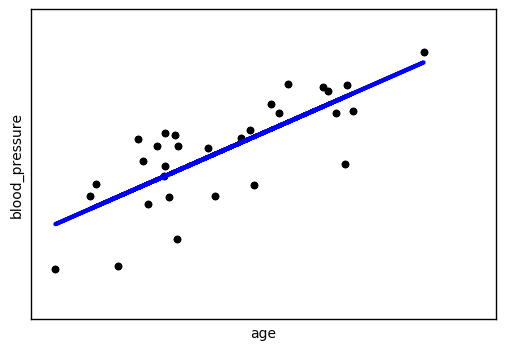

In [139]:
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
df2.plot(kind='scatter', x='age', y='blood_pressure')

age2 = df2.age
bp2 = df2.blood_pressure

age2 = age2.reshape(-1, 1)
bp2 = bp2.reshape(-1, 1)
regr = linear_model.LinearRegression()
regr.fit(age2, bp2)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(age2) - bp2) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(age2, bp2))

# Plot outputs
plt.scatter(age2, bp2,  color='black')
plt.plot(age2, regr.predict(age2), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [148]:
df1.describe()

,blood_pressure,age
count,30.000000,30.000000
mean,193.632568,76.419431
std,10.744819,8.476798
min,168.038423,59.481521
25%,186.009547,70.286313
50%,195.145007,76.447460
75%,200.624363,84.757961
max,209.973069,87.262260


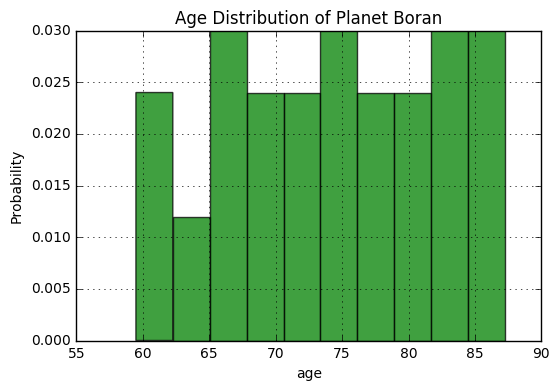

In [150]:
#the histogram of the data
x = df1.age
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('age')
plt.ylabel('Probability')
plt.title('Age Distribution of Planet Boran')
plt.axis([55, 90, 0, 0.03])
plt.grid(True)

plt.show()

In [149]:
df2.describe()

,blood_pressure,age
count,30.000000,30.000000
mean,103.482301,84.217069
std,4.272000,6.977068
min,94.041680,71.826780
25%,100.863369,79.630264
50%,103.956240,82.166353
75%,106.606746,89.186006
max,111.513411,99.544450


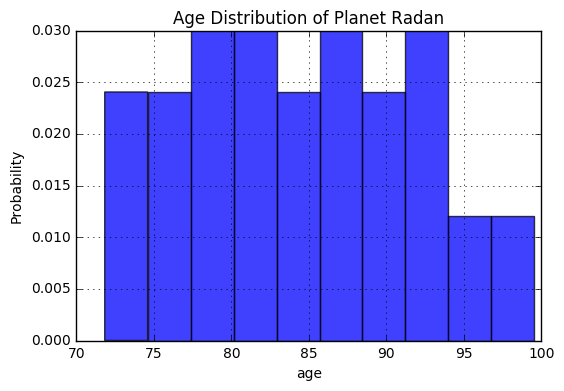

In [151]:
#the histogram of the data
x = df2.age
n, bins, patches = plt.hist(x, 10, normed=1, facecolor='blue', alpha=0.75)

plt.xlabel('age')
plt.ylabel('Probability')
plt.title('Age Distribution of Planet Radan')
plt.axis([70, 100, 0, 0.03])
plt.grid(True)

plt.show()